In [38]:
import matplotlib.pyplot as plt
import textwrap
import numpy as np

from transformers import GPT2LMHeadModel, GPT2Tokenizer
from transformers import pipeline
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline
from diffusers import StableDiffusionInstructPix2PixPipeline
from PIL import Image

# Transformers

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/14czgowF2Kj_2haUMwVbfgjiEoK2g7TzJ?usp=sharing)

**Transformers** are a family of deep learning models designed to understand sequences — text, audio, images, video, and even multimodal data — using a mechanism called self-attention. In this notebook we use the generic transformers package.

Instead of processing data one step at a time (like NNs), transformers look at all parts of the input at once and learn:

- Which parts are important

- How different pieces relate to each other

- How to represent meaning, context, and dependencies

This makes transformers very powerful for tasks where understanding relationships. One package like this can do language modeling, image captioning, audio transcription, object detection, question answering, and even generative tasks.

Because transformers can be pretrained on huge datasets (web text, images, audio), they learn general-purpose representations. With minimal fine-tuning or even zero-shot use, they can perform dozens of tasks across different modalities.

# Text Generation

In [5]:
# Load GPT-2
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.eval()
print("Done loading GPT!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Done loading GPT!


In [6]:
# Input text prompt
prompt = "Is AI alive?"
inputs = tokenizer(prompt, return_tensors="pt")

In [9]:
text_chain = prompt
iterations = 3
texts = []

for i in range(iterations):
    print(f"\n=== Iteration {i+1} ===")

    inputs = tokenizer(text_chain, return_tensors="pt")
    with torch.no_grad():
        out = model.generate(
            **inputs,
            max_length=len(inputs["input_ids"][0]) + 60,
            temperature=0.8,
            top_p=0.9,
            do_sample=True
        )

    text_chain = tokenizer.decode(out[0], skip_special_tokens=True)
    texts.append(text_chain)
    print(text_chain)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



=== Iteration 1 ===


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Is AI alive?


I want to make it clear that AI is not alive. It is a very real problem that has plagued humanity for quite some time. AI is alive because of our ability to communicate with other humans. It is also the result of many people's constant attempts to escape from this terrible situation.

=== Iteration 2 ===


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Is AI alive?


I want to make it clear that AI is not alive. It is a very real problem that has plagued humanity for quite some time. AI is alive because of our ability to communicate with other humans. It is also the result of many people's constant attempts to escape from this terrible situation. If you want to live a good life, you have to communicate with others. It is true that AI is alive because of the people who have tried to escape from it. The only reason we are alive is because of our ability to communicate with others.


It's not just about AI.

=== Iteration 3 ===
Is AI alive?


I want to make it clear that AI is not alive. It is a very real problem that has plagued humanity for quite some time. AI is alive because of our ability to communicate with other humans. It is also the result of many people's constant attempts to escape from this terrible situation. If you want to live a good life, you have to communicate with others. It is true that AI is alive because of the peo

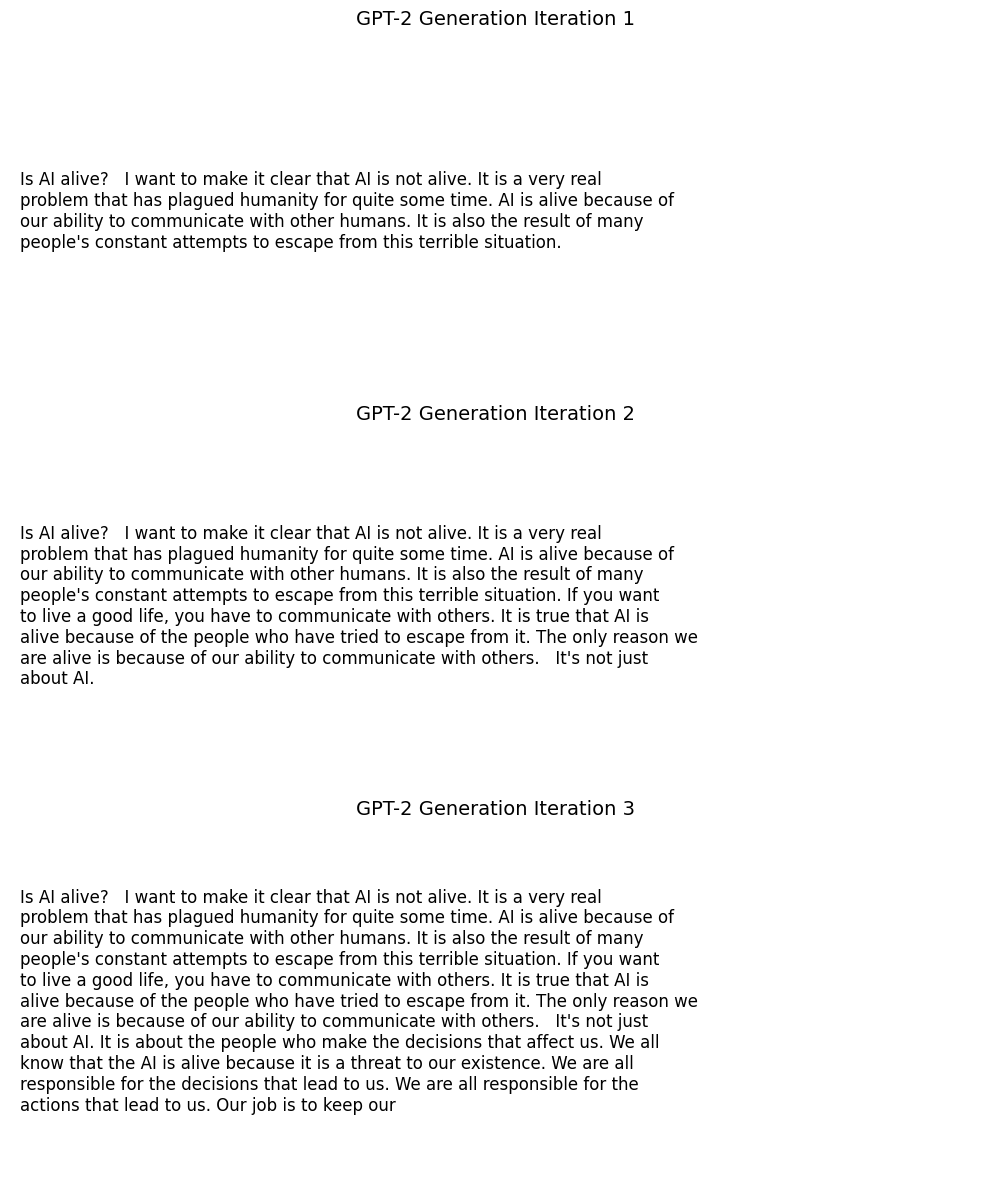

In [14]:
plt.figure(figsize=(10, 4*iterations))

for i, t in enumerate(texts):
    plt.subplot(iterations, 1, i+1)

    wrapped = "\n".join(textwrap.wrap(t, width=80))
    plt.text(0.01, 0.5, wrapped, fontsize=12, va="center")
    plt.title(f"GPT-2 Generation Iteration {i+1}", fontsize=14)
    plt.axis("off")

plt.tight_layout()
plt.show()

# Question Answering

In [15]:
qa = pipeline("question-answering")

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [16]:
context = """DS 3001 is just the coolest class ever!!!"""

In [17]:
qa(question="What is the coolest class ever?", context=context)

{'score': 0.9850075811482384, 'start': 0, 'end': 7, 'answer': 'DS 3001'}

In [18]:
qa(question="What is DS 3001?", context=context)

{'score': 0.3142898976802826,
 'start': 16,
 'end': 33,
 'answer': 'the coolest class'}

# Sentiment Analysis

In [19]:
sent_clf = pipeline("sentiment-analysis")  # default sentiment model

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


In [20]:
print(sent_clf("I love working with transformers!"))

[{'label': 'POSITIVE', 'score': 0.999541163444519}]


In [23]:
print(sent_clf("Its horrible. I hate it. Burn it."))

[{'label': 'NEGATIVE', 'score': 0.999697208404541}]


# Image to Text

In [24]:
vqa = pipeline("visual-question-answering", model="dandelin/vilt-b32-finetuned-vqa")

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/470M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/320 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/470M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/251 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [25]:
image_path = "squirrel.jpg"

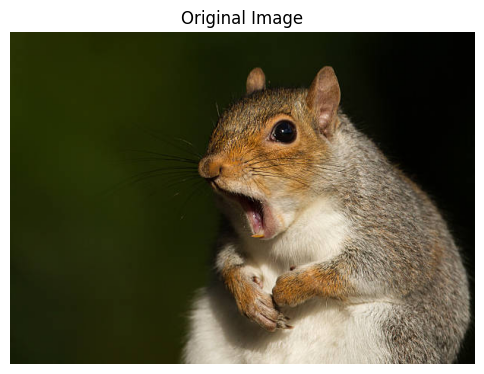

In [31]:
img = Image.open(image_path)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

In [26]:
question = "What is in this image?"

[{'score': 0.6541092395782471, 'answer': 'squirrel'}, {'score': 0.058855924755334854, 'answer': 'bird'}, {'score': 0.015187280252575874, 'answer': 'donut'}, {'score': 0.01489260420203209, 'answer': 'animal'}, {'score': 0.010202175937592983, 'answer': 'cat'}]


In [29]:
vqa(image=image_path, question=question)

[{'score': 0.6541092395782471, 'answer': 'squirrel'},
 {'score': 0.05885596573352814, 'answer': 'bird'},
 {'score': 0.015187258832156658, 'answer': 'donut'},
 {'score': 0.014892631210386753, 'answer': 'animal'},
 {'score': 0.01020219549536705, 'answer': 'cat'}]

# Machine Translation

In [27]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-fr") #English to French

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/301M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


In [28]:
print(translator("Deep learning is fun.")[0]["translation_text"])

L'apprentissage profond est amusant.


# Image Conversion

In [39]:
# Load the model
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    "timbrooks/instruct-pix2pix",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [40]:
image_path = "squirrel.jpg"

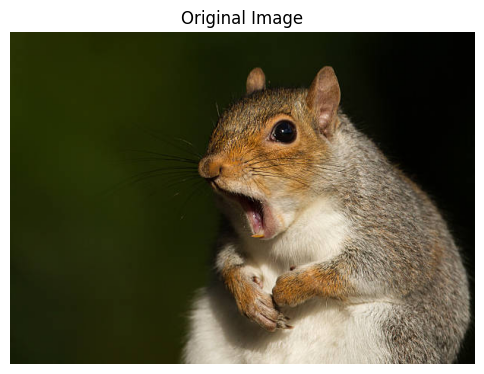

In [41]:
img = Image.open(image_path)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

In [42]:
image = Image.open(image_path).convert("RGB")    # ALWAYS convert to RGB
image = image.resize((512, 512))

In [ ]:
prompt = "Make this scene look like a watercolor painting."

result = pipe(prompt=prompt, image=image, num_inference_steps=30)
edited_image = result.images[0]

In [ ]:
edited_image.save("edited_output.jpg")
edited_image.show()
